# Linear Regression 

Linear Regression의 model은 다음과 같습니다.

* Y는 target variable
* x는 predictor variables 
* $ \beta_n $ 은 coefficients


$$ Y = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_n  x_n $$

예를 들어서 어떤 회사의 대표가 새로운 신발 매장을 특정 도시에 내려고 합니다.<br>
이때 해당 도시의 인구에 따른 소득을 예측하여 어디 도시에 새로운 점포를 낼지 결정할수 있습니다.<br>
최종 계산은 다음과 같이 할수 있을수 있습니다.

$$ Y = -2.45188937 + 0.3418351 * 인구 $$

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Data

Text(0, 0.5, 'Profit in $10,000s')

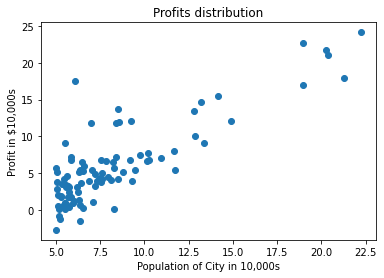

In [4]:
data = np.loadtxt('ex1data1.csv', delimiter=',')

scatter(data[:, 0], data[:, 1])
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')

## Gradient Descent 

Linear Regression의 목표(objective)는 cost값을 낮추는 것입니다. 

$$ \begin{aligned} J(w_j) &= \frac{1}{N} \sum^N_{i=1} (y_i - \hat{y}_i )^2  \\
&= \frac{1}{N} \sum^N_{i=1} (y_i - (w^Tx + b) )^2  
\end{aligned} $$

위의 공식에서 예측값 $ \hat{y}_i $는 다음과 같습니다.<br>
$ w_0 $ 은 bias값입니다.

$$ \begin{aligned} \hat{y} &= w^Tx + b  \\
&= w_1x_1 + w_2x_2 + ... + w_nx_n + b \\
\end{aligned} $$

**Derivative of the Weights**

$$ \frac{\partial}{\partial w} \left[ w^T x + b \right] = x $$

**Derivative of the Bias**

$$ \frac{\partial}{\partial b} \left[ w^T x + b \right] = 1 $$

error값에 대한 Gradient Descent를 하기 위해서는 먼저 gradient를 구해야 합니다.<br>
gradient는 compass와 같으며, 아래로 내려가는 방향을 알려줍니다.

먼저 derivative of $ x^2 = 2x $ 임으로 다음과 같이 변합니다.

$$ \begin{aligned} \frac{\partial}{\partial w} &= \frac{2}{N} \sum^N_{i=1} (y_i -(wx + b)) 
\end{aligned} $$

<span style="color:#aa3333">
$$ \frac{\partial}{\partial w} = \Delta w =  \frac{2}{N} \sum^N_{i=1} -x_i(y_i - \sum_{j=0}(w_j x_j )) $$
</span>

<span style="color:#aa3333">
$$ \frac{\partial}{\partial b} = \Delta b = \frac{2}{N} \sum^N_{i=1} -(y_i - \sum_{j=0}(w_j x_j)) $$
</span>

따라서 weights와 bias의 업데이트는 다음과 같이 합니다. 

$$ w = w - \eta \cdot \Delta w $$

$$ b = b - \eta \cdot \Delta b $$

In [4]:
def gradient_descent(x, y, w, eta=0.001):
    _w = np.zeros(2)
    N = float(len(data))
    for i in range(0, int(N)):
        update = (y[i] - w[1:].dot(x[i]) + w[0])
        _w[1:] += -(2/N) * update * x[i]
        _w[0] += -(2/N) * update
    new_weights = w - eta * _w
    return new_weights
    
def predict(x, w):
    x = np.array([x])
    return w[0] + w[1:].dot(x)

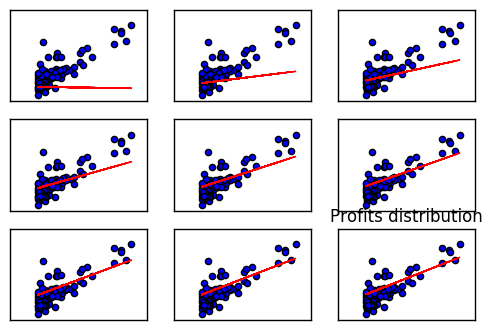

In [11]:
# 초기 weights 값
w = np.random.randn(2)
n_epoch = 9

# Predicting and Plotting
for i in range(1, n_epoch + 1):
    w = gradient_descent(data[:, 0], data[:, 1], w, eta=0.002)
    yhat = predict(data[:, 0], w)

    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(data[:, 0], data[:, 1])
    plot(data[:, 0], yhat, color='red')
    
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
